# Stanford CME 241 (Winter 2026) - Assignment 1

**Due: Friday, January 23 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):*

https://github.com/my-username/my-repo/assignment-file-name.ipynb

*Group members (replace below names with people in your group):*
- Person 1
- Person 2
- Person 3

## Imports

In [ ]:
from collections import defaultdict
from rl.markov_process import FiniteMarkovProcess, NonTerminal, Terminal
from rl.distribution import Categorical
import matplotlib.pyplot as plt

## Question 1: Snakes and Ladders (Led by Lucas Tellez)

In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.


### Problem Statement

How can we model this problem with a Markov Process?

---

### Subquestions

#### Part (A): MDP Modeling

Formalize the state space of the Snakes and Ladders game. Don't forget to specify the terminal state!

---

#### Part (B): Transition Probabilities

Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

---

#### Part (C): Modeling the Game

Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces, and plot the graph of the distribution of time steps to finish the game. Use the image provided for the locations of the snakes and ladders.

https://drive.google.com/file/d/1yhP242sG092Ico_WOPKrUp8jVJHbuGHH/view?usp=sharing

---

### Part (A) Answer

Let $n$ be the number of players in the game. Then the state space $\mathcal{S}$ is described by any n-tuple in $\{0,...,100\}^n$ (i.e with integer entries from 0 to 100), with the set of terminal states $\mathcal{T}$ described by the states with any entry equal to 100. The reward function $R$ is a deterministic function of the state, with 1 reward given for winning the game (i.e reaching a terminal state where your integer is 100) and 0 reward otherwise. The action distribution cannot be changed by the player, and is entirely determined by the state (where the player is and if the game is not over) and by the presumably uniform distribution of the die rolls.

### Part (B) Answer

Let $f:\mathbb Z_{\geq 0} \rightarrow \{0,...,100\}$ be given as follows. For any $k \in \{0,...,100\}$ with no ladder bottom or snakehead, $f$ is the identity (i.e $f(k) = k$). When $k$ is at a ladder bottom, then $f(k)$ gives the ladder top, while if $k$ is at a snake head $f(k)$ is at the tail of the snake. Finally if $k > 100$ then $f(k) := f(100 - (k \mod 100))$. We can now compactly represent the transition probability for player $j$'s turn from position $k$ in a nonterminal state $S$ as $$ p_j(k,k') = |f^{-1}(k')\cap\{k+1,k+2,...,k+6\}|/6 $$ 

### Part (C) Answer

[49, 13, 31, 17, 46, 81, 25, 43, 18, 21, 84, 20, 9, 24, 19, 33, 17, 28, 21, 26, 32, 15, 107, 14, 67, 36, 55, 67, 65, 29, 8, 34, 122, 54, 36, 24, 17, 29, 59, 68, 21, 32, 29, 25, 16, 36, 33, 67, 41, 45, 90, 13, 52, 45, 18, 41, 62, 37, 27, 122, 27, 32, 52, 29, 26, 19, 72, 26, 35, 23, 42, 19, 24, 24, 68, 20, 27, 28, 35, 35, 17, 23, 40, 26, 12, 22, 34, 36, 11, 47, 70, 35, 73, 17, 36, 26, 37, 47, 24, 33, 32, 43, 26, 34, 17, 29, 47, 119, 42, 14, 11, 53, 52, 50, 36, 38, 13, 64, 18, 37, 21, 43, 80, 15, 19, 40, 29, 26, 23, 52, 54, 14, 75, 80, 49, 19, 28, 91, 28, 68, 81, 26, 39, 28, 20, 48, 79, 37, 70, 37, 34, 25, 26, 35, 35, 93, 36, 17, 50, 27, 51, 26, 23, 42, 20, 52, 38, 24, 41, 49, 104, 17, 32, 29, 82, 36, 34, 12, 26, 55, 57, 27, 20, 11, 19, 15, 21, 35, 110, 53, 48, 53, 11, 49, 35, 45, 102, 30, 34, 120, 15, 62, 27, 63, 26, 17, 12, 45, 26, 73, 31, 69, 54, 111, 43, 37, 65, 16, 35, 12, 12, 28, 25, 51, 26, 38, 119, 101, 17, 20, 46, 69, 36, 94, 14, 16, 235, 24, 128, 56, 22, 88, 17, 31, 29, 58, 18, 

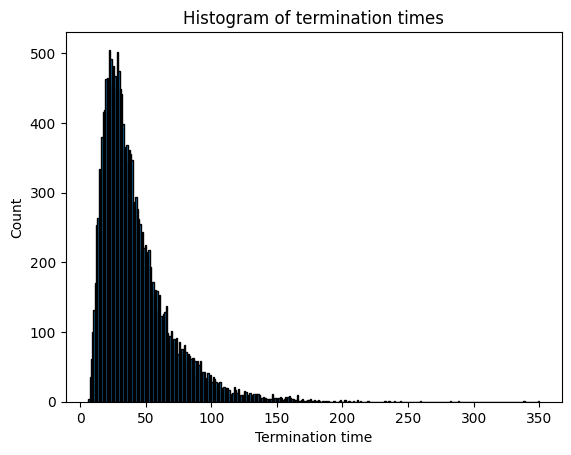

In [ ]:
# Assuming one player since no number of players is specified.
f = {1 : 38 , 4 : 14 , 8 : 30 , 21 : 42 , 28 : 76 , 32 : 10 , 36 : 6 , 48 : 26 , 50 : 67 , 62 : 18 , 71 : 92 , 80 : 99 , 88 : 24 , 95 : 56 , 97 : 78 , 101 : 99 , 102 : 98 , 103 : 97 , 104 : 96 , 105 : 95}
for i in range(1,101):
    if i not in f.keys():
        f[i] = i

P = {}

for k in range(0, 100 + 1):
    counts = defaultdict(int)

    for x in range(k + 1, k + 7):
        y = f.get(x)
        if y is None:
            continue
        if 1 <= y <= 100:
            counts[y] += 1

    P[k] = {kp: c / 6 for kp, c in counts.items()}

transition_map = {
    s: Categorical(P[s])
    for s in range(100)
    }
sl = FiniteMarkovProcess(transition_map)
start_dist = Categorical({NonTerminal(0): 1.0})
def termination_time(mp, start_dist) -> int:
    t = 0
    for st in mp.simulate(start_dist):
        if not isinstance(st, NonTerminal):
            return t
        t += 1

N = 20_000
times = [termination_time(sl, start_dist) for _ in range(N)]
plt.hist(times, bins=range(min(times), max(times)+2), edgecolor="black")
plt.xlabel("Termination time")
plt.ylabel("Count")
plt.title("Histogram of termination times")
plt.show()

## Question 2: Markov Decision Processes (Led by Lucas Tellez)

Consider an MDP with an infinite set of states ${S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by:
$$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in S \text{ for all } a \in [0,1]$$
For all states $s \in {S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Problem Statement

How can we derive a mathematical formulation for the value function and the optimal policy? And how do those functions change when we modify the action space?

---

### Subquestions

#### Part (A): Optimal Value Function  

Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in {S}$. Given $V^*(s)$, what is the optimal action, $a^*$, that maximizes the optimal value function?

---

#### Part (B): Optimal Policy  

Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in {S}$.

---

#### Part (C): Changing the Action Space  

Let's assume that we modify the action space such that instead of $a \in [0,1]$ for all states, we restrict the action space to $a \in \left[0,\frac{1}{s}\right]$ for state $s$. This means that higher states have more restricted action spaces. How does this constraint affect:

- The form of the Bellman optimality equation?
- The optimal value function, $V^*(s)$?
- The structure of the optimal policy, $\pi^*(s)$?

---

### Part (A) Answer

Plugging in the problem dynamics to the Bellman Optimality equation yields $$ V^*(s) = \max_{a \in [0,1]}[  a(1-a) + (1-a)(1+a) + \gamma (1-a)V^*(s) + \gamma aV^*(s+1) ] $$ Note that the reward does not depend on the current state, and is in fact only dependent on the action $a$ via its control of the state transition. This means that $V^*$ is constant over $s$ hence we get the reduced equation $$ V^* = \max_{a \in [0,1]}[  a(1-a) + (1-a)(1+a) + \frac{1}{2} V^* ] \implies V^* = 2\max_{a \in [0,1]}[  - 2a^2 + a + 1] $$ To find this maximum we differentiate the expression to be maximized $$-4a^* + 1 = 0 \implies a^* = \frac{1}{4} \implies V^* = \frac{5}{4}$$

### Part (B) Answer

As outlined in part a, the optimal deterministic policy is to always take action $a = \frac{1}{4}$ at every state.

### Part (C) Answer

#### Bellman Optimality Equation Change:

The Bellman Equation changes to $$ V^*(s) = \max_{a \in [0,1/s]} \bigg[ -2a^2 + a + 1 + \frac{1}{2}(1-a)V^*(s) + \frac{1}{2}aV^*(s+1)\bigg] $$ In effect the set of actions to maximize over becomes dependent on the state.

#### Optimal Value Function Change:
The optimal value function is no longer constant because through the constraint on the action space, the reward is no longer state-independent. Since the agent can only move forward, it should asymptote towards a value since the actions become more and more constrained.

#### Optimal Policy Change:
The deterministic optimal policy (could be nonunique I suppose) becomes nonconstant, as the only possible constant policy is $\pi^* = 0$ which is suboptimal since for $s \geq 2$ the policy $\pi^*(s) = 1/s$ has expected reward $1 + \frac{s-2}{s^2} \geq 1$. It obviously does satisfy the limit/asymptote condition $\lim_{s\uparrow\infty}\pi^*(s) = 0$ due to the constraint.

## Question 3: Frog in a Pond (Led by Jordan Rothkowitz)

Consider an array of $n+1$ lilypads on a pond, numbered $0$ to $n$. A frog sits on a lilypad other than the lilypads numbered $0$ or $n$. When on lilypad $i$ ($1 \leq i \leq n-1$), the frog can croak one of two sounds: **A** or **B**.

- If it croaks **A** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to lilypad $i-1$ with probability $\frac{i}{n}$.
  - It is thrown to lilypad $i+1$ with probability $\frac{n-i}{n}$.
  
- If it croaks **B** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to one of the lilypads $0, \ldots, i-1, i+1, \ldots, n$ with uniform probability $\frac{1}{n}$.

A snake, perched on lilypad $0$, will eat the frog if it lands on lilypad $0$. The frog can escape the pond (and hence, escape the snake!) if it lands on lilypad $n$.

### Problem Statement

What should the frog croak when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (i.e., reaching lilypad $n$ before reaching lilypad $0$)?

Although there are multiple ways to solve this problem, we aim to solve it by modeling it as a **Markov Decision Process (MDP)** and identifying the **Optimal Policy**.

---

### Subquestions

#### Part (A): MDP Modeling

Express the frog-escape problem as an MDP using clear mathematical notation by defining the following components:

- **State Space**: Define the possible states of the MDP.
- **Action Space**: Specify the actions available to the frog at each state.
- **Transition Function**: Describe the probabilities of transitioning between states for each action.
- **Reward Function**: Specify the reward associated with the states and transitions.

---

#### Part (B): Python Implementation

There is starter code below to solve this problem programatically. Fill in each of the $6$ `TODO` areas in the code. As a reference for the transition probabilities and rewards, you can make use of the example in slide 16/31 from the following slide deck: https://github.com/coverdrive/technical-documents/blob/master/finance/cme241/Tour-MP.pdf.

Write Python code that:

- Models this MDP.
- Solves the **Optimal Value Function** and the **Optimal Policy**.

Feel free to use/adapt code from the textbook. Note, there are other libraries that are needed to actually run this code, so running it will not do anything. Just fill in the code so that it could run assuming that the other libraries are present.

---

#### Part (C): Visualization and Analysis

What patterns do you observe for the **Optimal Policy** as you vary $n$ from $3$ to $25$? When the frog is on lilypad $13$ (with $25$ total), what action should the frog take? Is this action different than the action the frog should take if it is on lilypad $1$?

---

### Part (A) Answer

#### State Space:  

The lilypad the frog is on, represented by an integer $s \in \{0,1,...,n\}$. The terminal states are $\{0,n\}$.

#### Action Space:  

When the frog is on a nonterminal state $s \in \{1,...,n-1\}$ it can either croak $A$ or $B$, i.e the set of actions on any nonterminal state is $\{A,B\}$.

#### Transition Function:  
for $s \in \{1,...,n-1\}$ nonterminal we have
$$p(s,a,s') = \begin{cases}
\frac{s}{n} : & s' = s - 1 \ , \ a = A\\
\frac{n-s}{n} : & s' = s + 1 \ , \ a = A\\
\frac{1}{n} : & s' \neq s \ , \ a = B\\
0 : & \text{otherwise}
\end{cases}$$

#### Reward Function:  
$$R(s,a) = \begin{cases}
1: & s = n\\
0: & s < n
\end{cases}$$

### Part (B) Answer

In [ ]:
MDPRefined = dict
def get_lily_pads_mdp(n: int) -> MDPRefined:
    # Note: data is a dict holding the transition probabilities under each action.
    data = {
        i: {
            'A': {
                i - 1: i / n, # P(i, i-1) = i / n under action A
                i + 1: (n - i) / n, # P(i, i+1) = (n - i) / n under action A
            },
            'B': {
                j: 1 / n for j in range(n + 1) if j != i # P(i, j) = 1 / n for all j != i
            }
        } for i in range(1, n)
    }
    data[0] = {
        'A': {0: 1.0},
        'B': {0: 1.0}
    } # State 0 is terminal
    data[n] = {
        'A': {n: 1.0},
        'B': {n: 1.0}
    } # State n is terminal

    gamma = 1.0
    return MDPRefined(data, gamma)

Mapping = dict
def direct_bellman(n: int) -> Mapping[int, float]:
    vf = [0.5] * (n + 1)
    vf[0] = 0.
    vf[n] = 0.
    tol = 1e-8
    epsilon = tol * 1e4
    while epsilon >= tol:
        old_vf = [v for v in vf]
        for i in range(1, n):
            # Action A: only states i-1 and i+1 reachable, only reward is if we reach state n.
            vA = (i / n) * (0.0 + old_vf[i - 1]) + ((n - i) / n) * ((1.0 if i + 1 == n else 0.0) + old_vf[i + 1])
            # Action B: uniform over all j != i
            vB = 0.0
            for j in range(n + 1):
                if j == i:
                    continue
                r = 1.0 if j == n else 0.0
                vB += (1 / n) * (r + old_vf[j])
            # Take the maximum over value under action A and value under action B. 
            vf[i] = max(vA, vB)
        epsilon = max(abs(old_vf[i] - v) for i, v in enumerate(vf))
    return {v: f for v, f in enumerate(vf)}

### Part (C) Answer

As we vary $n$ from 3 to 25, the optimal policy stays the same; namely, the frog should croak B on lilypad 1 and A everywhere else. With 25 total lilypads, if the frog is on lilypad 13 it should croak A, but if it's on lilypad 1 it should croak B.

## Question 4: Manual Value Iteration (Led by Jordan Rothkowitz)

Consider a simple MDP with ${S} = \{s_1, s_2, s_3\}, {T} = \{s_3\}, {A} = \{a_1, a_2\}$. The State Transition Probability function  
$$
{P}: {N} \times {A} \times {S} \rightarrow [0, 1]
$$  
is defined as:  
$$
{P}(s_1, a_1, s_1) = 0.25, {P}(s_1, a_1, s_2) = 0.65, {P}(s_1, a_1, s_3) = 0.1
$$  
$$
{P}(s_1, a_2, s_1) = 0.1, {P}(s_1, a_2, s_2) = 0.4, {P}(s_1, a_2, s_3) = 0.5
$$  
$$
{P}(s_2, a_1, s_1) = 0.3, {P}(s_2, a_1, s_2) = 0.15, {P}(s_2, a_1, s_3) = 0.55
$$  
$$
{P}(s_2, a_2, s_1) = 0.25, {P}(s_2, a_2, s_2) = 0.55, {P}(s_2, a_2, s_3) = 0.2
$$  

The Reward Function  
$$
{R}: {N} \times {A} \rightarrow \mathbb{R}
$$  
is defined as:  
$$
{R}(s_1, a_1) = 8.0, {R}(s_1, a_2) = 10.0
$$  
$$
{R}(s_2, a_1) = 1.0, {R}(s_2, a_2) = -1.0
$$  

Assume a discount factor of $\gamma = 1$.

### Problem Statement

Your task is to determine an Optimal Deterministic Policy **by manually working out** (not with code) the first two iterations of the Value Iteration algorithm.

---

### Subquestions

#### Part (A): 2 Iterations

1. Initialize the Value Function for each state to be its $\max$ (over actions) reward, i.e., we initialize the Value Function to be $v_0(s_1) = 10.0, v_0(s_2) = 1.0, v_0(s_3) = 0.0$. Then manually calculate $q_k(\cdot, \cdot)$ and $v_k(\cdot)$ from $v_{k - 1}(\cdot)$ using the Value Iteration update, and then calculate the greedy policy $\pi_k(\cdot)$ from $q_k(\cdot, \cdot)$ for $k = 1$ and $k = 2$ (hence, 2 iterations).

---

#### Part (B): Argument

1. Now argue that $\pi_k(\cdot)$ for $k > 2$ will be the same as $\pi_2(\cdot)$. *Hint*: You can make the argument by examining the structure of how you get $q_k(\cdot, \cdot)$ from $v_{k-1}(\cdot)$. With this argument, there is no need to go beyond the two iterations you performed above, and so you can establish $\pi_2(\cdot)$ as an Optimal Deterministic Policy for this MDP.

---

#### Part (C): Policy Evaluation

1. Using the policy $\pi_2(\cdot)$, compute the exact value function $V^{\pi_2}(s)$ for all $s\in S$.

---

#### Part (D): Sensitivity Analysis

Assume the reward for $R(s_1, a_2)$ is modified to $11.0$ instead of $10.0$.

1. Perform one iteration of Value Iteration starting from the initialized value function $v_0(s)$, where $v_0(s)$ remains the same as in the original problem.
2. Determine whether this change impacts the Optimal Deterministic Policy $\pi(\cdot)$. If it does, explain why.

---

### Part (A) Answer

For non-terminal states $s \in \mathcal S \setminus \mathcal T$:

$$
q_k(s,a) = R(s,a) + \sum_{s' \in \mathcal S} P(s,a,s')\, v_{k-1}(s')
$$

$$
v_k(s) = \max_{a \in \mathcal A} q_k(s,a)
$$

The greedy policy at iteration $k$ is

$$
\pi_k(s) = \arg\max_{a \in \mathcal A} q_k(s,a)
$$

The terminal state $s_3$ satisfies $v_k(s_3)=0$ for all $k$. We are given
$$
v_0(s_1) = 10, \quad v_0(s_2) = 1, \quad v_0(s_3) = 0, \quad \gamma = 1.
$$

For $k=1$:

$$
\begin{aligned}
q_1(s_1,a_1)
&= 8 + 0.25(10) + 0.65(1) + 0.10(0) \\
&= 11.15
\end{aligned}
$$

$$
\begin{aligned}
q_1(s_1,a_2)
&= 10 + 0.10(10) + 0.40(1) + 0.50(0) \\
&= 11.40
\end{aligned}
$$

$$
\begin{aligned}
q_1(s_2,a_1)
&= 1 + 0.30(10) + 0.15(1) + 0.55(0) \\
&= 4.15
\end{aligned}
$$

$$
\begin{aligned}
q_1(s_2,a_2)
&= -1 + 0.25(10) + 0.55(1) + 0.20(0) \\
&= 2.05
\end{aligned}
$$

$$
v_1(s_1) = \max\{11.15, 11.40\} = 11.40,
\quad \pi_1(s_1) = a_2
$$

$$
v_1(s_2) = \max\{4.15, 2.05\} = 4.15,
\quad \pi_1(s_2) = a_1
$$

$$
v_1(s_3) = 0
$$

For $k=2$:

$$
\begin{aligned}
q_2(s_1,a_1)
&= 8 + 0.25(11.40) + 0.65(4.15) + 0.10(0) \\
&= 13.5475
\end{aligned}
$$

$$
\begin{aligned}
q_2(s_1,a_2)
&= 10 + 0.10(11.40) + 0.40(4.15) + 0.50(0) \\
&= 12.80
\end{aligned}
$$

$$
\begin{aligned}
q_2(s_2,a_1)
&= 1 + 0.30(11.40) + 0.15(4.15) + 0.55(0) \\
&= 5.0425
\end{aligned}
$$

$$
\begin{aligned}
q_2(s_2,a_2)
&= -1 + 0.25(11.40) + 0.55(4.15) + 0.20(0) \\
&= 4.1325
\end{aligned}
$$

$$
v_2(s_1) = \max\{13.5475, 12.80\} = 13.5475,
\quad \pi_2(s_1) = a_1
$$

$$
v_2(s_2) = \max\{5.0425, 4.1325\} = 5.0425,
\quad \pi_2(s_2) = a_1
$$

$$
v_2(s_3) = 0
$$

### Part (B) Answer:  

We observe that $q_k(s,a)$ depends linearly on $v_{k-1}$. For non terminal states $s\in\set{s_1,s_2}$ and actions $a\in\set{a_1,a_2}$,
$$
\begin{align*}
q_k(s,a) &= R(s,a) + \sum_{s'\in\set{s_1,s_2,s_3}} P(s,a,s')v_{k-1}(s')\\
&= R(s,a) + P(s,a,s_1)v_{k-1}(s_1)+P(s,a,s_2)v_{k-1}(s_2)
\end{align*}
$$
since $v_k(s_3)=0$ for all $k$. For a fixed state $s$, the difference between the expected returns for each action is given by
$$
\begin{align*}
\Delta_k(s) := q_k(s,a_1)-q_k(s,a_2) &= (R(s,a_1)-R(s,a_2)+(P(s,a_1,s_1)-P(s,a_2,s_1))v_{k-1}(s_1)+(P(s,a_1,s_2)-P(s,a_2,s_2))v_{k-1}(s_2))\\
\Delta_k(s_1)&= (8-10)+(.25-.1)v_{k-1}(s_1)+(.65-.4)v_{k-1}(s_2)\\
&= -2+.15v_{k-1}(s_1)+.25v_{k-1}(s_2)
\end{align*}
$$

Note that if $\Delta_k(s)$ is positive, that means that $q_k(s,a_1) > q_k(s,a_2)$ which implies $\pi_k(s)=a_1$, and if it is negative, then $q_k(s,a_1) < q_k(s,a_2)$ which implies $\pi_k(s)=a_2$. Thus the sign of $\Delta_k(s)$ determines the greedy action for step $k$ at state $s$.

Therefore, we want to show that the sign of $\Delta_k(s_1)$ is constant for $k\geq 2$, because that will imply that the policy $\pi_k(s_1)$ will not change after $k=2$.

To show this, first note that value iteration is monotone: if $v\leq w$ componentwise, then $T(v)\leq T(w)$, where $T$ is the Bellman optimality update*. Since the computed values thus far satisfy $v_0\leq v_1\leq v_2\leq \dots$, we have that $v_{k-1}(s_1)$ is nondecreasing in $k$. 
Second, we see that the coefficients 0.15 and 0.25 are positive, so $\Delta_k(s_1)=-2+.15v_{k-1}(s_1)+.25v_{k-1}(s_2)$ is nondecreasing in $k$.
Since $\Delta_k(s_1)$ is nondecreasing and already positive at $k=2$, it stays positive for all later $k$:
$$
\Delta_k\geq \Delta_2>0 \forall k>2.
$$
Thus the argmax never changes after $k=2$, so $\pi_k(s_1)=\pi_2(s_1)=a_1$ for all $k\geq2$.


*Proof that the Bellman optimality operator is monotone: Let $T$ be the optimality update such that
$$
(Tv)(s) = \max_{a\in\mathcal{A}}\left(R(s,a) + \gamma\sum_{s'\in S}P(s,a,s')v(s')\right).
$$

We will show that if $v(s)\leq w(s)$ for every state $s$ (componentwise), then $(Tv)(s)\leq (Tw)(s)$ for all $s$.
Since $v(s')\leq w(s')$ for all $s'$, and $P(s,a,s')\geq 0$ for all $s'$, multiplying preserves the inequality:
$$
P(s,a,s')v(s')\leq P(s,a,s')w(s') \qquad \forall s'
$$
Summing and multiplying by $\gamma \geq 0$ also preserves it:
$$
\gamma \sum_{s'} P(s,a,s')v(s')\leq \gamma \sum_{s'} P(s,a,s')w(s') 
$$
Adding the same $R(s,a)$ to both sides preserves it:
$$
R(s,a) + \gamma \sum_{s'} P(s,a,s')v(s')\leq R(s,a) + \gamma \sum_{s'} P(s,a,s')w(s') 
$$
for any fixed $s$ and $a$.
One last fact is that if $x_i\leq y_i$ for all $i$, then $\max_i x_i\leq \max_i y_i$. Thus, since 
$$
R(s,a) + \gamma \sum_{s'} P(s,a,s')v(s')\leq R(s,a) + \gamma \sum_{s'} P(s,a,s')w(s') 
$$
for each action $a$, we apply this and get 
$$
\begin{align*}
\max_{a\in\mathcal{A}}\left(R(s,a) + \gamma\sum_{s'\in S}P(s,a,s')v(s')\right) &\leq \max_{a\in\mathcal{A}}\left(R(s,a) + \gamma\sum_{s'\in S}P(s,a,s')w(s')\right)\\
(Tv)(s)&\leq (Tw)(s) \qquad \forall s
\end{align*}
$$

### Part (C) Answer:  

From (a), we have $\pi_2(s_1)=a_1$ and $\pi_2(s_2)=a_1$. Now we solve the Bellman expectation equations
$$
V^\pi(s) = R(s,\pi(s))+\sum_{s'\in S}P(s,\pi(s),s')V^\pi(s').
$$
This gives
$$
\begin{align*}
V^{\pi_2}(s_1) &= 8+0.25V^{\pi_2}(s_1)+0.65V^{\pi_2}(s_2)\\
V^{\pi_2}(s_2) &= 1+0.30V^{\pi_2}(s_1)+0.15V^{\pi_2}(s_2)
\end{align*}
$$
In matrix form:
$$
\begin{align*}
\begin{pmatrix} V^{\pi_2}(s_1) \\ V^{\pi_2}(s_2)\end{pmatrix} - \begin{pmatrix}0.25 & 0.65\\0.30 & 0.15\end{pmatrix}\begin{pmatrix} V^{\pi_2}(s_1) \\ V^{\pi_2}(s_2)\end{pmatrix} &= \begin{pmatrix}8 \\ 1 \end{pmatrix}\\
\left(\begin{pmatrix} 1&0\\0&1\end{pmatrix} - \begin{pmatrix}0.25 & 0.65\\0.30 & 0.15\end{pmatrix} \right)\begin{pmatrix} V^{\pi_2}(s_1) \\ V^{\pi_2}(s_2)\end{pmatrix} &= \begin{pmatrix}8 \\ 1 \end{pmatrix}\\
 \begin{pmatrix}0.75 & -0.65\\-0.30 & 0.85\end{pmatrix} \begin{pmatrix} V^{\pi_2}(s_1) \\ V^{\pi_2}(s_2)\end{pmatrix} &= \begin{pmatrix}8 \\ 1 \end{pmatrix}
\end{align*}
$$

Solving this yields 
$$
\begin{pmatrix} V^{\pi_2}(s_1) \\ V^{\pi_2}(s_2)\end{pmatrix} = \begin{pmatrix} 16.836 \\ 7.119\end{pmatrix}
$$
and we know $V^{\pi_2}(s_3)=0$.

### Part (D) Answer

#### Value Iteration:  

Updating the reward to $R(s_1,a_2)=11.0$, we calculate for state $s_1$
$$
q_1(s_1,a_1) = 8 + 0.25(10) + 0.65(1) = 11.15\\
q_1(s_1,a_2) = 11 + 0.10(10) + 0.40 (1) = 12.4\\
v_1(s_1)=12.40, \qquad \pi_1(s_1)=a_2
$$
and the values for state $s_2$ remain unchanged from part (a):
$$
q_1(s_2,a_1)=4.15, \qquad q_1(s_2,a_2) = 2.05\\
v_1(s_2)= 4.15, \qquad \pi_1(s_2)=a_1
$$

## Question 5: Fixed-Point and Policy Evaluation True/False Questions (Led by Lucas Tellez)

### Recall Section: Key Formulas and Definitions

#### Bellman Optimality Equation
The Bellman Optimality Equation for state-value functions is:
$$
V^*(s) = \max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^*(s') \right].
$$
For action-value functions:
$$
Q^*(s, a) = R(s, a) + \gamma \sum_{s'} P(s, a, s') \max_{a'} Q^*(s', a').
$$

#### Contraction Property
The Bellman Policy Operator $B^\pi$ is a contraction under the $L^\infty$-norm:
$$
\|B^\pi(X) - B^\pi(Y)\|_\infty \leq \gamma \|X - Y\|_\infty.
$$
This guarantees convergence to a unique fixed point.

#### Policy Iteration
Policy Iteration alternates between:
1. **Policy Evaluation**: Compute $V^\pi$ for the current policy $\pi$.
2. **Policy Improvement**: Generate a new policy $\pi'$ by setting:
   $$
   \pi'(s) = \arg\max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^\pi(s') \right].
   $$

#### Discounted Return
The discounted return from time step $t$ is:
$$
G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i,
$$
where $\gamma \in [0, 1)$ is the discount factor.

### True/False Questions (Provide Justification)

1. **True/False**: If $Q^\pi(s, a) = 5$, $P(s, a, s') = 0.5$ for $s' \in \{s_1, s_2\}$, and the immediate reward $R(s, a)$ increases by $2$, the updated action-value function $Q^\pi(s, a)$ also increases by $2$.


---

2. **True/False**: For a discount factor $\gamma = 0.9$, the discounted return for rewards $R_1 = 5, R_2 = 3, R_3 = 1$ is greater than $6$.

---

3. **True/False**: The Bellman Policy Operator $B^\pi(V) = R^\pi + \gamma P^\pi \cdot V$ satisfies the contraction property for all $\gamma \in [0, 1)$, ensuring a unique fixed point.

---

4. **True/False**: In Policy Iteration, the Policy Improvement step guarantees that the updated policy $\pi'$ will always perform strictly better than the previous policy $\pi$.

---

5. **True/False**: If $Q^\pi(s, a) = 10$ for all actions $a$ in a state $s$, then the corresponding state-value function $V^\pi(s) = 10$, regardless of the policy $\pi$.

---

6. **True/False**: The discounted return $G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i$ converges to a finite value for any sequence of bounded rewards if $\gamma < 1$.

---

### Answers (Provide justification, brief explanations are fine)

#### Question 1:  

True

#### Question 2:  

False, if for instance rewards are consistently less than or equal to $-2$ thereafter then $$G_0 = 5 + (0.9)3 + (0.9)^2 1 + (0.9)^{3}\sum_{i = 4}^\infty \gamma^{i - 4}R_i = 8.51 + (0.9)^3 \sum_{i=4}^\infty \gamma^{i - 4}R_i\leq 8.51 + (0.9)^3 10 (-2) = -6.07 < 6 $$

#### Question 3:  

True

#### Question 4:  

True

#### Question 5:  

False

#### Question 6:  

True assuming $\gamma \geq 0$.